In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline
mpl.rc('xtick', direction='in', top=True)
mpl.rc('ytick', direction='in', right=True)
mpl.rc('xtick.minor', visible=True)
mpl.rc('ytick.minor', visible=True)
plt.rcParams['font.size'] = 13
plt.rcParams['figure.figsize'] = [8,6]
import datetime as dt
import scipy.special as sf
import scipy.optimize as opt

In [2]:
%run Fraunhofer.py

In [78]:
def Plane_wave(k,size):
  x = np.linspace(0, 10, size)
  y = np.linspace(0, 10, size)
  [xx,yy] = np.meshgrid(x,y)
  theta = 0
  kx = k * np.cos(theta)
  ky = k * np.sin(theta)
  plane_wave = np.sin(kx*xx + ky*yy)
  plane_wave += plane_wave.max()
  return(plane_wave)


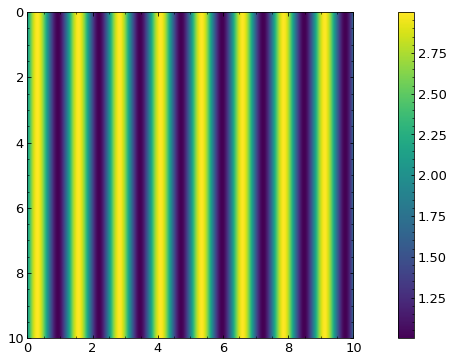

In [121]:
#starttime = dt.datetime.now()

screen = {}
screen['N'] = 1024
screen['D'] = 10
Initialize(screen)
center = (screen['D']/2, screen['D']/2)
screen['E'] = screen['E'] + Plane_wave(5,1024)
#MultByGaussian(screen, center, 1.0)
#InCircle(screen, center, 2.0)
# c2 = (center[0]-0.2, center[1]-0.1)
# CircleAtten(screen,c2,0.1,1.3)
# c2 = (center[0]+0.1, center[1]+0.3)
# CircleAtten(screen,c2,0.1,1/1.3)
# c2 = (center[0]+0.3, center[1]-0.1)
# CircleAtten(screen,c2,0.1,1.3)
# c2 = (center[0]-0.3, center[1]+0.2)
# CircleAtten(screen,c2,0.1,1/1.3)
ScreenFFT(screen)

#lam = 0.002 #mm wavelength
#kphot = 2*np.pi/lam
#thetamaxdeg = 2.0
#thetamax = 2*np.pi/180. # 2 degrees in radians
#theta_vec = np.linspace(-thetamax,thetamax,512) 
#II0 = Project_I_on_thetagrid(theta_vec,screen,lam) 
plt.imshow(screen['E'],extent=(0,screen['D'],screen['D'],0))
plt.colorbar()
#endtime = dt.datetime.now()
#t = (endtime-starttime).seconds
#print(t)

(460.0, 550.0)

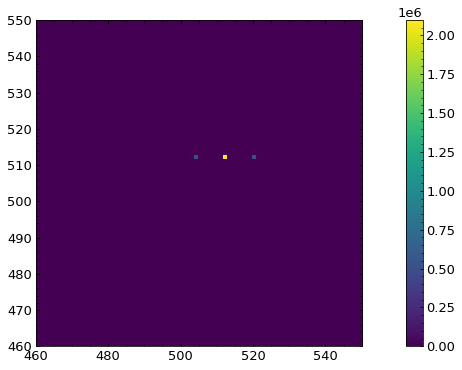

In [122]:
plt.imshow(np.abs(np.fft.fftshift(np.fft.fft2(screen['E']))))
plt.colorbar()
plt.xlim(460,550)
plt.ylim(460,550)


177


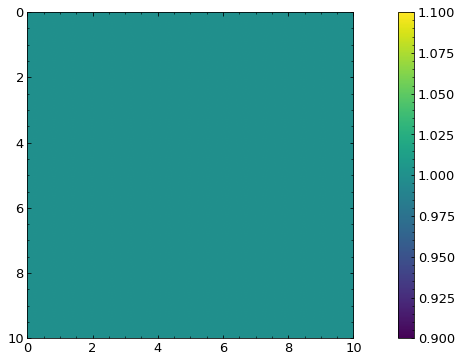

In [47]:
#starttime = dt.datetime.now()
screen1 = {}
screen1['N'] = 4096
screen1['D'] = 10
Initialize(screen1)
center = (screen1['D']/2, screen1['D']/2)
#MultByGaussian(screen1, center, 1.0) #sigma 1.0
#InCircle(screen1, center, 2.0) #radius 2.0
#c2 = (center[0]-0.2, center[1]-0.3)
c2 = (center[0]-2, center[1]-1)
CircleAtten(screen1,c2,0.1,1.0*np.exp(np.pi/2*1j))
ScreenFFT(screen1)

lam = 0.002 #mm wavelength
kphot = 2*np.pi/lam
thetamaxdeg = 2.0
thetamax = 2*np.pi/180. # 2 degrees in radians
theta_vec = np.linspace(-thetamax,thetamax,1024) 
II1 = Project_I_on_thetagrid(theta_vec,screen1,lam) 
plt.imshow(np.abs(screen1['E']),extent=(0,screen1['D'],screen1['D'],0))
plt.colorbar()
endtime = dt.datetime.now()
t = (endtime-starttime).seconds
print(t)

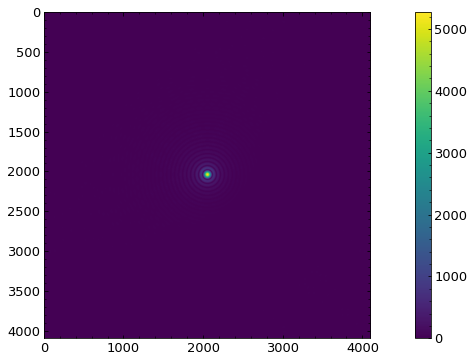

In [39]:
plt.imshow(np.abs(np.imag(screen1['FFT_E'])))
plt.colorbar()

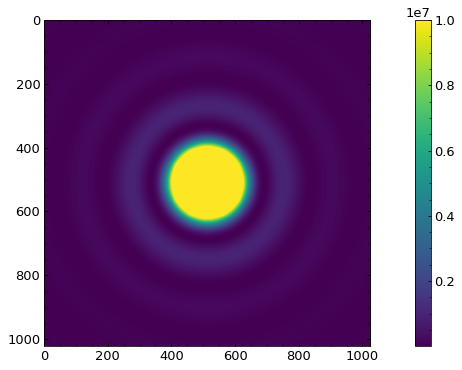

In [48]:
plt.imshow(II1,vmax=1e7)
plt.colorbar()

(-100.0, 1000.0)

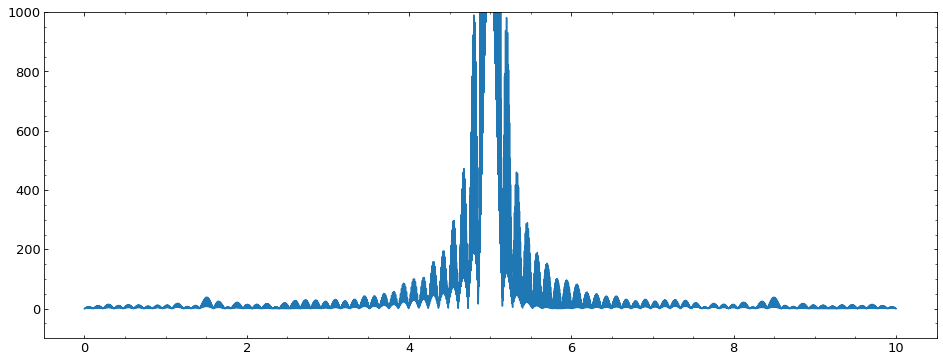

In [51]:
#plt.plot(screen['X'][512], II0[512])
#plt.plot(screen['X'][2048],screen['I'][2048])
#plt.plot(screen['X'][2048],np.real(screen['FFT_E'])[2048])
plt.plot(screen1['X'][2048],np.abs(np.imag(screen1['FFT_E']))[2048])
plt.ylim(-100,1e3)


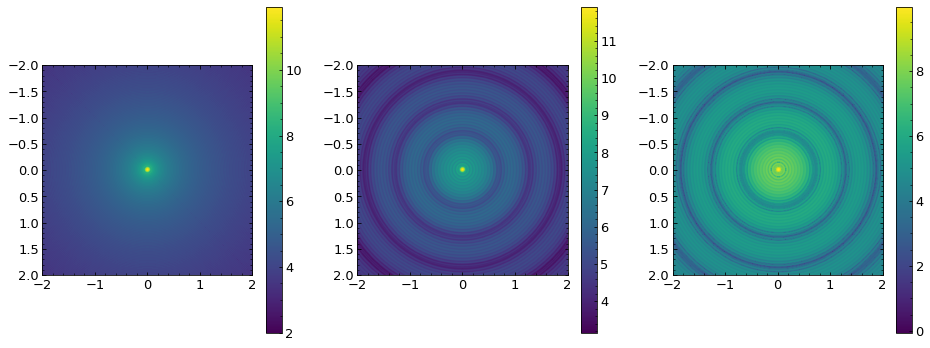

In [7]:
Idiff = II1-II0
plt.rcParams['figure.figsize'] = [16, 6]
plt.subplot(1,3,1)
plt.imshow(np.log10(np.abs(II0)),interpolation = None,extent=[-thetamaxdeg,thetamaxdeg,thetamaxdeg,-thetamaxdeg])
plt.colorbar()

plt.subplot(1,3,2)
plt.imshow(np.log10(np.abs(II1)),interpolation = None,extent=[-thetamaxdeg,thetamaxdeg,thetamaxdeg,-thetamaxdeg])
plt.colorbar()

plt.subplot(1,3,3)
plt.imshow(np.log10(np.abs(Idiff)),interpolation = None,extent=[-thetamaxdeg,thetamaxdeg,thetamaxdeg,-thetamaxdeg])
plt.colorbar()



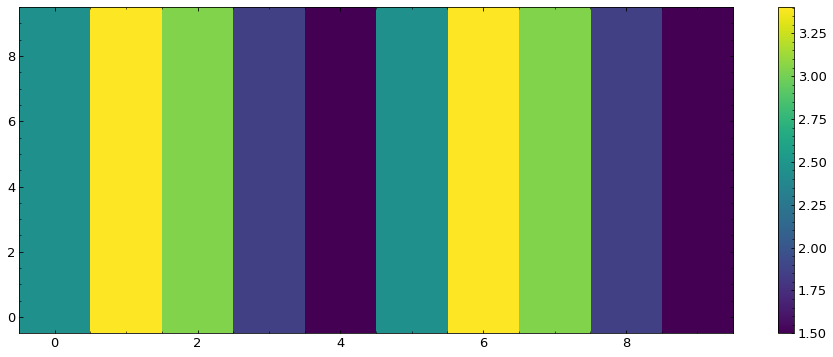

In [106]:
## 2D sinusoidal wave
f = 10         # frequency
c = 50             # speed of wave
w = 2*np.pi *f     # angular frequency
k = w/c            # wave number

resolution = 1
x = np.arange(-5, 5, resolution)
y = np.arange(-5, 5, resolution)
dx = np.array(x); M = len(dx)
dy = np.array(y); N = len(dy)
[xx, yy] = np.meshgrid(x, y)
#theta = np.pi / 4         # direction of propagation
theta = 0
kx = k * np.cos(theta)
ky = k * np.sin(theta)

plane_wave = np.sin(kx * xx + ky * yy)
plane_wave += (plane_wave.max()+1.5)
plt.figure(); 
plt.imshow(plane_wave,origin='lower', aspect='auto')
plt.colorbar()

(450.0, 550.0)

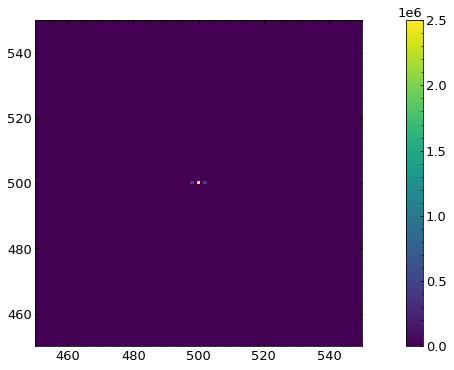

In [99]:
fft = np.fft.fftshift(np.fft.fft2(plane_wave))
plt.imshow(np.abs(fft))
plt.colorbar()
plt.xlim(450,550)
plt.ylim(450,550)

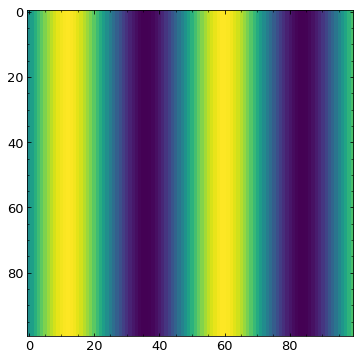

In [114]:
test = Plane_wave(1.3,100)
plt.imshow(test)

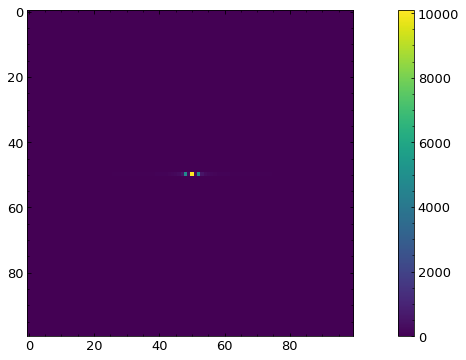

In [116]:
fft = np.fft.fftshift(np.fft.fft2(test))
plt.imshow(np.abs(fft))
plt.colorbar()
#plt.xlim(450,550)
#plt.ylim(450,550)